  # Análisis de Series de Tiempo

  ## Introducción

  El objetivo de esta tarea es realizar un análisis de series de tiempo utilizando un conjunto de datos obtenido de Kaggle. A lo largo de este proyecto, se llevarán a cabo los siguientes pasos:

  1. Selección de un conjunto de datos adecuado relacionado con series de tiempo.
  2. Visualización de las series de tiempo.
  3. Interpretación de las gráficas.
  4. Presentación de los resultados y las interpretaciones iniciales.

  Este análisis servirá como una exploración inicial para entender las características subyacentes de los datos y prepararlos para un análisis más profundo en futuras etapas del proyecto.

  # Análisis de Series de Tiempo: Precios del Oro (1985 - 2022)

  ## Descripción del Dataset
  El dataset contiene los precios del oro registrados entre 1985 y enero de 2022. El objetivo es analizar las tendencias y patrones a lo largo de este período de tiempo.

  ## Analisis del Dataset

  ## Paso 1: Cargar las librerías necesarias

  Para llevar a cabo el análisis y las visualizaciones, necesitamos importar las siguientes librerías:

  

In [9]:
import pandas as pd          
import numpy as np          
import matplotlib.pyplot as plt  
import seaborn as sns        

# Configurar el estilo de las gráficas
sns.set_theme(style="whitegrid")

## Subir las bases de datos

In [10]:
annual_gold_rate = pd.read_csv('annual_gold_rate.csv')
daily_gold_rate = pd.read_csv('daily_gold_rate.csv')

# Mostrar las primeras filas del dataset
annual_gold_rate.head(), daily_gold_rate.head()

(         Date     USD        EUR        GBP         INR         AED  CNY
 0  1980-12-31  614.50  378.19461  263.80259  4831.74943  2278.36795  NaN
 1  1981-12-31  459.26  360.90588  227.01948  3966.64790  1691.03194  NaN
 2  1982-12-31  375.30  345.59742  215.53232  3553.62680  1378.72895  NaN
 3  1983-12-30  423.66  439.89318  279.24936  4270.42821  1557.45790  NaN
 4  1984-12-31  360.78  425.91000  269.81553  4067.60433  1324.72272  NaN,
          Date     USD     EUR     GBP      INR      AED    CNY
 0  1985-01-01  308.30  402.45  266.01  3825.85  1134.42    NaN
 1  1985-01-02  305.50  401.49  266.00  3787.05  1134.42    NaN
 2  1985-01-03  302.30  397.08  262.76  3718.88  1107.67    NaN
 3  1985-01-04  303.15  397.15  262.58  3759.64  1118.21    NaN
 4  1985-01-07  298.25  392.55  261.17  3741.23  1091.58  835.8)

## Análisis del Dataset

Los datos provienen de precios históricos del oro, registrados tanto a nivel anual como diario, permitiendo un análisis detallado de las tendencias de largo y corto plazo.

- **annual_gold_rate.csv**: Este dataset contiene los precios anuales del oro desde 1980 hasta 2022, expresados en divisas como USD, EUR, GBP, INR, AED, y CNY. Cada fila representa el último día de cada año.

- **daily_gold_rate.csv**: Este dataset registra los precios diarios del oro desde 1985 hasta 2022, proporcionando detalles sobre las fluctuaciones diarias en las mismas divisas mencionadas.



## Visualización de las Series de Tiempo

### Precios Anuales del Oro (1980 - 2022)




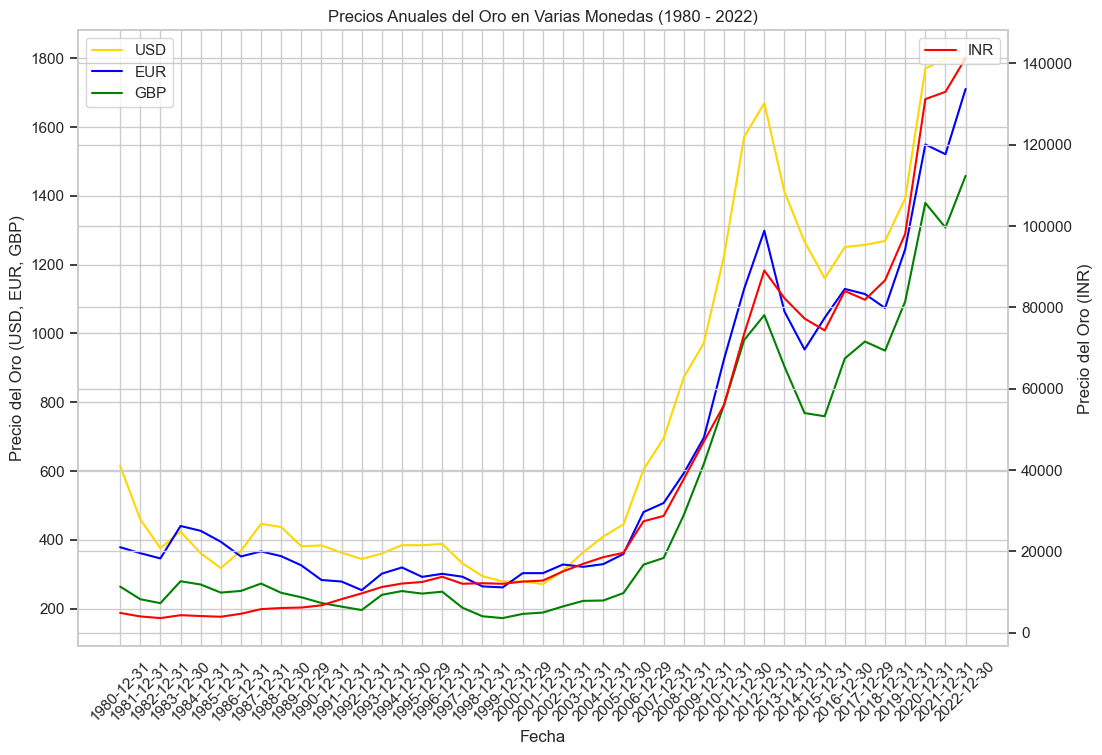

In [15]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# Primer eje (para monedas como USD, EUR, GBP)
ax1.plot(annual_gold_rate['Date'], annual_gold_rate['USD'], label='USD', color='gold')
ax1.plot(annual_gold_rate['Date'], annual_gold_rate['EUR'], label='EUR', color='blue')
ax1.plot(annual_gold_rate['Date'], annual_gold_rate['GBP'], label='GBP', color='green')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio del Oro (USD, EUR, GBP)')
ax1.legend(loc='upper left')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True)

# Crear un segundo eje para INR (que tiene una escala muy diferente)
ax2 = ax1.twinx()  # Comparte el mismo eje X
ax2.plot(annual_gold_rate['Date'], annual_gold_rate['INR'], label='INR', color='red')
ax2.set_ylabel('Precio del Oro (INR)')
ax2.legend(loc='upper right')

# Título
plt.title('Precios Anuales del Oro en Varias Monedas (1980 - 2022)')

# Mostrar la gráfica
plt.show()


#### Interpretación de la Gráfica de Precios Anuales del Oro (1980 - 2022)

La gráfica muestra la evolución de los precios del oro en varias divisas (USD, EUR, GBP, e INR) desde 1980 hasta 2022. Se observan las siguientes tendencias clave:

1. **Tendencia general al alza**: Tanto en USD, EUR, GBP, como en INR, los precios del oro han mostrado una tendencia creciente a lo largo de los años, con variaciones en ciertos períodos.
   
2. **Incremento pronunciado en 2008-2012**: Se observa un incremento significativo en todas las divisas durante el período 2008-2012, coincidiendo con la crisis financiera global. Este aumento puede estar relacionado con la creciente demanda de activos refugio como el oro en tiempos de incertidumbre económica.

3. **Diferencias en la magnitud de precios**: El precio del oro en INR muestra una escala mucho mayor que en USD, EUR, y GBP. Esto refleja la diferencia en el valor relativo de las monedas y la inflación experimentada en países como India, donde la demanda de oro es alta por razones culturales y económicas.

### Precios Diarios del Oro (1980 - 2022)

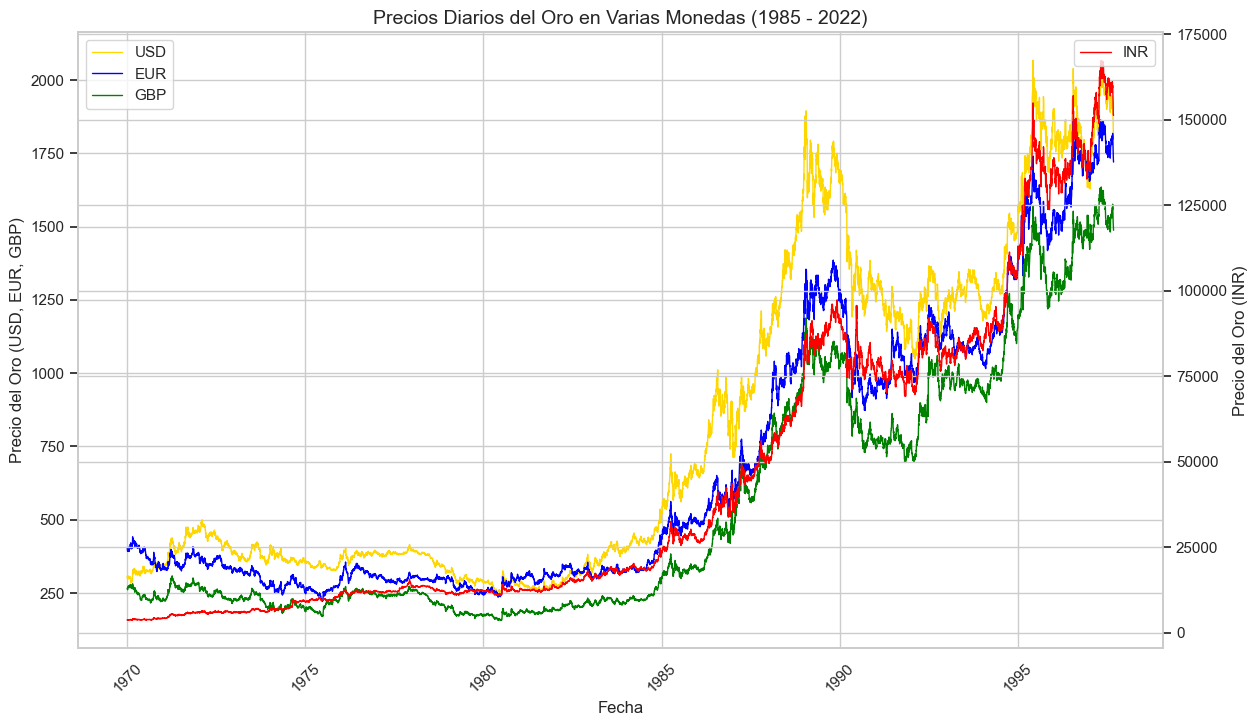

In [17]:
import matplotlib.dates as mdates

# Crear una figura y dos ejes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Primer eje (para monedas como USD, EUR, GBP)
ax1.plot(daily_gold_rate['Date'], daily_gold_rate['USD'], label='USD', color='gold', linewidth=1)
ax1.plot(daily_gold_rate['Date'], daily_gold_rate['EUR'], label='EUR', color='blue', linewidth=1)
ax1.plot(daily_gold_rate['Date'], daily_gold_rate['GBP'], label='GBP', color='green', linewidth=1)
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio del Oro (USD, EUR, GBP)', fontsize=12)
ax1.legend(loc='upper left')
ax1.tick_params(axis='x', rotation=45)
ax1.xaxis.set_major_locator(mdates.YearLocator(5))  # Mostrar etiquetas de años cada 5 años
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax1.grid(True)

# Crear un segundo eje para INR (que tiene una escala muy diferente)
ax2 = ax1.twinx()  # Comparte el mismo eje X
ax2.plot(daily_gold_rate['Date'], daily_gold_rate['INR'], label='INR', color='red', linewidth=1)
ax2.set_ylabel('Precio del Oro (INR)', fontsize=12)
ax2.legend(loc='upper right')

# Cambiar el color de fondo a blanco (para restaurar la visualización normal)
fig.patch.set_facecolor('white')

# Título
plt.title('Precios Diarios del Oro en Varias Monedas (1985 - 2022)', fontsize=14)

# Mostrar la gráfica
plt.show()


## Interpretación de la Gráfica

La gráfica muestra la evolución diaria de los precios del oro en varias divisas (USD, EUR, GBP, e INR) desde 1985 hasta 2022. Se destacan las siguientes observaciones:

1. **Tendencia alcista a largo plazo**: A lo largo del período 1985-2022, se puede observar una tendencia alcista general en todas las monedas. Este comportamiento es consistente con el papel del oro como un activo de refugio, cuyo valor esta directamente relacionado a la incertidumbre económica.

2. **Pico entre 2008 y 2012**: Al igual que en la gráfica de los precios anuales, los precios del oro en todas las monedas experimentaron un aumento pronunciado durante la crisis financiera global (2008-2012). Este fenómeno refleja la búsqueda de seguridad de los inversores durante períodos de volatilidad económica.

3. **Caída y recuperación en 2013-2020**: Después del pico en 2012, los precios del oro disminuyeron ligeramente antes de volver a subir en 2020 seguramente por la incertidumbre economica que represento a los inicios de la pandemia.

4. **Mayor volatilidad reciente**: A partir de 2020, los precios del oro han mostrado una mayor volatilidad, especialmente en INR. Esto puede reflejar la incertidumbre económica global y la respuesta de los mercados frente a eventos recientes como la pandemia y la inflación.